In [7]:
include("../scripts/tools.jl")
include("../scripts/get_grid.jl")
include("../scripts/get_params.jl")
include("../scripts/plotting.jl")
include("../scripts/stable.jl")
include("../scripts/dynamics.jl")
include("../scripts/disturbances.jl")
include("../scripts/ps_analysis.jl");
using FFTW

In [2]:
border, scale_factor = import_border("../data/borders/border.json")

dx = 0.005
mesh = get_grid(border, dx); # renamed to be able to use the grid function for plotting

In [3]:
# compute or load grid parameters
contmod = get_params(mesh, scale_factor, "../data/disc/pantagruel.h5", Niter=10,
    dmax = 2*dx, patch=1900.0, bmin=52.0, tau=5.0e-7);

  5.773705 seconds (3.77 M allocations: 16.983 GiB, 6.03% gc time, 3.33% compilation time)
  4.339602 seconds (4.27 M allocations: 1.250 GiB, 10.24% gc time, 63.38% compilation time)


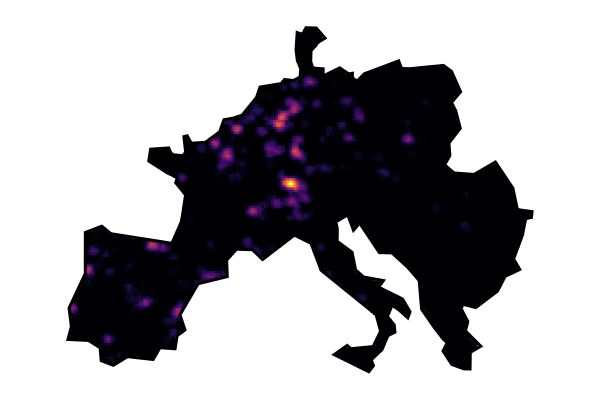

In [6]:
hm_plot(contmod, contmod.bx, borders=[border])

0.08857984517366582


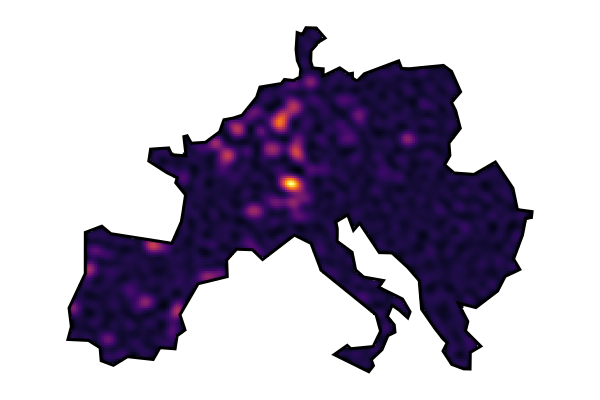

In [27]:
bxft = fft(reshape(contmod.bx,contmod.Ny, contmod.Nx))
bxft[abs.(bxft) .< 0.007*maximum(abs.(bxft))] .= 0
println(sum(abs.(bxft) .> 0) / sum(contmod.bx .> 0))
bx2 = vec(ifft(bxft))
hm_plot(contmod, real.(bx2), borders=[border])

[-0.6033270799121987 -0.5983270799121987]
[-0.6033270799121987 -0.6033270799121987]
[-0.6033270799121987 -0.5983270799121987]
[-0.6033270799121987 -0.6033270799121987]
[-0.6033270799121987 -0.5983270799121987]
[-0.6033270799121987 -0.6033270799121987]
[-0.6033270799121987 -0.5983270799121987]
[-0.6033270799121987 -0.5983270799121987]
[-0.6033270799121987 -0.6033270799121987]
[-0.6033270799121987 -0.5983270799121987]
[-0.6033270799121987 -0.6033270799121987]
[-0.6033270799121987 -0.5983270799121987]
[-0.6033270799121987 -0.6033270799121987]
[-0.6033270799121987 -0.5983270799121987]
[-0.6033270799121987 -0.6033270799121987]
[-0.6033270799121987 -0.5983270799121987]
[-0.5983270799121987 -0.5933270799121987]
[-0.5983270799121987 -0.5983270799121987]
[-0.5983270799121987 -0.5933270799121987]
[-0.5983270799121987 -0.5983270799121987]
[-0.5983270799121987 -0.5933270799121987]
[-0.5983270799121987 -0.5983270799121987]
[-0.5983270799121987 -0.5933270799121987]
[-0.5983270799121987 -0.5983270799

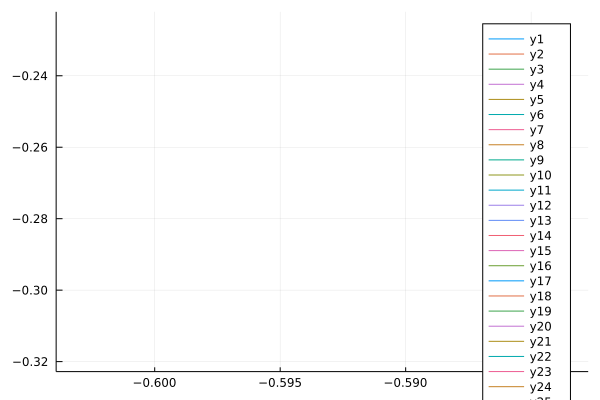

In [59]:

# create the list of edges
# the following is incomplete but should be sufficient
epsilon = Int64.(zeros(4*contmod.Nx*contmod.Ny, 2))
l = 1

for k in 1:contmod.Nx*contmod.Ny
    if(contmod.isgrid[k])
        epsilon[l,:] = [k k+contmod.Ny]
        epsilon[l+1,:] = [k k+1]
        l +=2
    end
end
epsilon = epsilon[1:l-1,:]

epsilon_new = Int64.(zeros(size(epsilon)))
id = findall(contmod.isgrid)
#id = findall(contmod.isborder)
#println(id)
for i = 1:length(id)
    id1 = (epsilon[:,1] .== id[i])
    id2 = (epsilon[:,2] .== id[i])
    epsilon_new[id1,1] .= i
    epsilon_new[id2,2] .= i
end


#sum(contmod.isgrid .& contmod.isborder)
#sum(contmod.isborder)
sum(epsilon_new .== 0) / sum(size(epsilon_new))
#contmod.Nx*contmod.Ny
coord = contmod.coord[contmod.isgrid, :]
#zeros(contmod.isgrid)




plot()
for k = 1:100
    if(epsilon_new[k,1] != 0 && epsilon_new[k,2] != 0)
        println(coord[[epsilon_new[k,1] epsilon_new[k,2]],2],)
        plot!(coord[[epsilon_new[k,1] epsilon_new[k,2]],2], coord[[epsilon_new[k,1] epsilon_new[k,2]],1])
    end
end
current()


In [ ]:
#=
load('border.mat')
border = [border; border(1,:)];

[x,y] = mercator(border);
border = [x,y];

dx = 0.004;

xrange = -0.2:dx:0.55;
yrange = 0.65:dx:1.25;

Nx = length(xrange);
Ny = length(yrange);

isgrid = zeros(Ny,Nx);

for i=1:Nx
   for j=1:Ny
       isgrid(j,i) = inPolygon([xrange(i),yrange(j)],border);
   end
end
=#


#[r,c] = find(isgrid == 1);

epsilon = zeros(1E6,2);
b = zeros(1E6,1);
k = 1;

# create the list of edges
epsilon = zeros(4*Nx*Ny, 2)
for k in 1:Nx*Ny
    if(contmod.isgrid[k])
        epsilon[l,:] = [k k+contmod.Ny]
        epsilon[l+1,:] = [k k+1]
        l +=2
    end
end
zeros(contmod.isgrid)

#=
% db = 0;
% for i=1:length(r)
%     if(isgrid(r(i),c(i)+1))
%         id = find((r ==r(i)) & (c ==c(i)+1));
%         epsilon(k,:) = [i, id];
%         b(k) = 1/dx^2;
%         k = k + 1;
%     end
%     if(isgrid(r(i)+1,c(i)))
%         id = find((r ==r(i)+1) & (c ==c(i)));
%         epsilon(k,:) = [i, id];
%         b(k) = 1/dx^2;
%         k = k + 1;
%     end
% end
=#


#=

id = find(epsilon(:,1)==0,1);

epsilon = epsilon(1:id-1,:);
b = b(1:id-1);

node_coord = [xrange(c)' yrange(r)'];


p = [0.16 0.97];
[~, start] = min((node_coord(:,1) - p(1)).^2 + (node_coord(:,2) - p(2)).^2);

n0 = length(r);

queue = start;
visited = false(n0,1);
visited(start) = true;
id_main = zeros(n0);
l = 1;

while(~isempty(queue))
    point = queue(1);
    id_main(l) = point;
    queue = queue(2:end);
    temp = [epsilon(epsilon(:,1)==point,2);epsilon(epsilon(:,2)==point,1)];
    for k=1:length(temp)
        if(~visited(temp(k)))
            queue = [queue;temp(k)];
            visited(temp(k)) = true;
        end
    end
    l = l + 1;
end
id_main = id_main(1:l-1);

node_coord = [xrange(c)' yrange(r)'];

plot(node_coord(:,1),node_coord(:,2),'.b')
hold on

node_coord = node_coord(id_main,:);
plot(node_coord(:,1),node_coord(:,2),'.r')


eps = zeros(size(epsilon));
bb = zeros(size(epsilon,1),1);

k = 1;
for i=1:size(epsilon,1)
    if(prod(ismember(epsilon(i,:),id_main)))
        eps(k,:) = [find(id_main == epsilon(i,1),1) find(id_main == epsilon(i,2),1)];
        bb(k) = b(i);
        k = k + 1;
    end
end

epsilon =  eps(1:k-1,:);
b = bb(1:k-1);

% id = find(eps(:,1) == 0,1);
% if(~isempty(id))
%     epsilon =  eps(1:id-1,:);
%     b = bb(1:id-1);
% else
%     epsilon =  eps;
%     b = bb;
% end

N = length(epsilon(:,1));

M = sparse([epsilon(:,1),epsilon(:,2)],[1:N 1:N], [-ones(N,1);ones(N,1)]);

B0 = sparse(1:N, 1:N, b);
% clearvars -except M isgrid node_coord B b epsilon

L = M*B0*M';

% [Vref, Dref] = eig(full(L));
n = length(id_main);


%%
clc

tic
% v = rand(n,1);
% v = v - mean(v);
% v = v/norm(v);
% 
% 
% for i=1:1E1
%     v = L*v;
%     v = v - mean(v);
%     v = v/norm(v);
% 
% %     disp([num2str(i) ': ' num2str(v'*(L*v))])minres
% %     disp([num2str(i) ': ' num2str(v'*(L*v))])
% end
% 
% 
% mumax =v'*(L*v);

load('uniform.mat')
b0 = sum(V(:,2:14),2);

m = 10;
D = zeros(m,1);
V = zeros(n,m);




for i=1:m
    lambda_old = inf;
%     mu = v'*(L*v);
    if(i>1)
        lambda = D(i-1);
    else
        lambda = 0.1;
%         mu = 16; 
    end
    x = rand(n,1);
%     b = b0;
    
    for j = 1:m-1
        x = x - (x'*V(:,j))*V(:,j);
    end
    x = x - mean(x);
    x = x/norm(x);

    iter = 1;
    while(abs(lambda_old-lambda)/abs(lambda) > 1E-4 && iter < 1E3)
            x = minres(L,lambda * x,1E-3, 60);
            for j = 1:m-1
                x = x - (x'*V(:,j))*V(:,j);
            end
            x = x - mean(x);
            x = x/norm(x);
            lambda_old = lambda;
            lambda = x' * (L * x);
            iter = iter + 1;
    end
    V(:,i) = x;
    D(i) = lambda;
end

[D, ids] = sort(D);
V = V(:,ids);
toc

%%

D0 = D;
V0 = V;

b=(1-1E-3*rand(size(b))).*b;

B = sparse(1:N, 1:N, b);
L = M*B*M';

tic;

for i=1:m
    lambda_old = inf;
%     mu = v'*(L*v);
    lambda = D(i);
    x = V(:,i);

    iter = 1;
    while(abs(lambda_old-lambda)/abs(lambda) > 1E-3 && iter < 1E3)
            x = minres(L,lambda * x,1E-3, 60);
            lambda_old = lambda;
            lambda = x' * (L * x);
            iter = iter + 1;
    end
    V(:,i) = x;
    D(i) = lambda;
end

[D, ids] = sort(D);
V = V(:,ids);
toc



%%

mode = nan(Ny, Nx);

temp = zeros(n0,1);
temp(id_main) = V(:,10);
id = find(temp == 0);
temp(id) = temp(id -1); 

mode(logical(isgrid)) = temp;
contourf(mode,50,'linestyle','none')
colorbar
% for i=1:m
%     Lt = L - sparse(1:n, 1:n, mumax*ones(n,1));
%     v = rand(n,1);
%     
%     for j = 1:m-1
%         v = v - (v'*V(:,j))*V(:,j);
%     end
%     v = v - mean(v);
%     v = v/norm(v);
%     
%     for ii=1:1E1
%         v = Lt*v;
%         for j = 1:m-1
%             v = v - (v'*V(:,j))*V(:,j);
%         end
%         v = v - mean(v);
%         v = v/norm(v);
% %         disp([num2str(ii) ': ' num2str(v'*(L*v))])
%     end
% 
% 
%     b = v;
%     mu_old = 0;
%     mu = v'*(L*v);
% %     if(i>1)
% %         mu = D(i-1);
% %     end
%     iter = 1;
%     while(abs(mu_old-mu)/abs(mu)> 1E-4 && iter < 1E3)
%             Lt = L - sparse(1:n, 1:n, mu*ones(n,1));
%             b = minres(Lt,b,0.9, 60);
%             for j = 1:m-1
%                 b = b - (b'*V(:,j))*V(:,j);
%             end
%             b = b - mean(b);
%             b = b/norm(b);
%             mu_old = mu;
%             mu = b' * (L * b);
%             iter = iter + 1;
%     end
%     V(:,i) = b;
%     D(i) = mu;
% end
% 
% [D, ids] = sort(D);
% V = V(:,ids);
% toc

% tic
% [D,V] = eig(full(L));
% toc
=#
